<a href="https://colab.research.google.com/github/Nimishajain77/39_SANS_2/blob/sheryl/DiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls gdrive/MyDrive

 05_SherylBellary.gdoc
 ai6.gdoc
 archive.zip
 Attendance.gdoc
'Colab Notebooks'
'CONVOLUTION  V S  INVOLUTION.gdoc'
'COUNCIL 2022-23.gsheet'
'How to get started with Drive.pdf'
 python
 Reptile.ipynb
 SherylBellary_Resume.pdf
'Shirin_Bellary_Resume (1) (1).gdoc'
'Shirin_Bellary_Resume (1) (1).pdf'
'Shirin_Bellary_Resume (1) (2).gdoc'
'Shirin_Bellary_Resume (1) (2).pdf'
'Shirin_Bellary_Resume (1) (3).pdf'
'Shirin_Bellary_Resume (1).gdoc'
'Shirin_Bellary_Resume (1).pdf'
 tableau.gsheet
'Tableau Workshop Registration Desk.gsheet'
'Untitled document.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 Vini


In [6]:
!unzip gdrive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [7]:
!pip install keras.applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [9]:
len(os.listdir('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [10]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
train = train_datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                          target_size = (256,256),
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                          target_size= (256,256),
                                          batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [12]:
t_img, label = train.next()

In [13]:
t_img.shape

(32, 256, 256, 3)

In [14]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

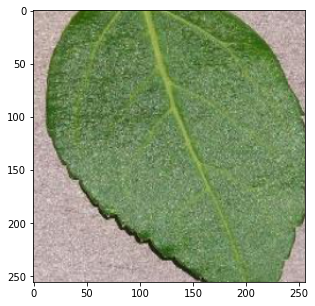

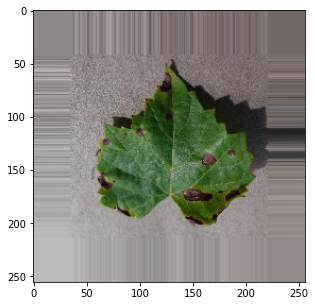

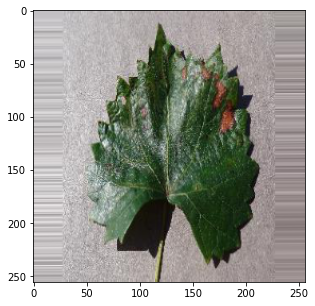

In [15]:
plotImage(t_img[:3], label[:3])

building model

In [16]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [17]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


In [18]:
for layer in base_model.layers:
  layer.trainable = False

In [19]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#creating model
model = Model(base_model.input, X)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

es and mc

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping 

es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience=3, verbose=1)

mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    patience= 3,
                    verbose=1,
                    save_best_only=True)

cb = [es,mc]

In [24]:
his = model.fit_generator(train,
                          steps_per_epoch= 16,
                          epochs= 50,
                          verbose = 1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 37.7966 - accuracy: 0.1719
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to best_model.h5
16/16 [==============================] - 30s 801ms/step - loss: 37.7966 - accuracy: 0.1719 - val_loss: 18.1231 - val_accuracy: 0.3281
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 21.7827 - accuracy: 0.3906
Epoch 2: val_accuracy improved from 0.32812 to 0.50781, saving model to best_model.h5
16/16 [==============================] - 12s 778ms/step - loss: 21.7827 - accuracy: 0.3906 - val_loss: 12.4240 - val_accuracy: 0.5078
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 17.0156 - accuracy: 0.4883
Epoch 3: val_accuracy improved from 0.50781 to 0.50977, saving model to best_model.h5
16/16 [==============================] - 14s 862ms/step - loss: 17.0156 - accuracy: 0.4883 - val_loss: 13.1661 - val_accuracy: 0.5098
Epoch 4/50
16/16 [==============================] - ETA: 0

In [25]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

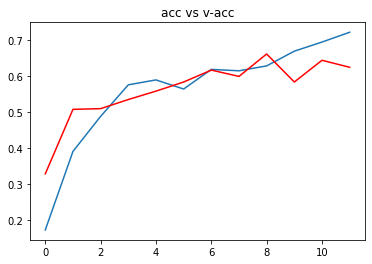

In [26]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show()

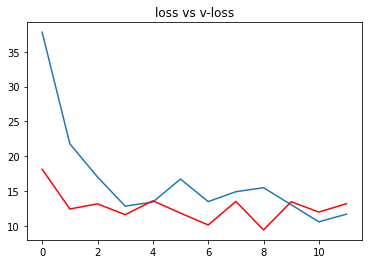

In [27]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show()

load best model

In [28]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

In [29]:
acc = model.evaluate_generator(val)[1]

print(f'The accuracy of your model is = {acc*100} %')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is = 64.9385392665863 %


In [30]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [31]:
def prediction(path):

  img = load_img(path, target_size=(256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis=0)

  pred = np.argmax(model.predict(img))

  print(f" The image belongs to { ref[pred] }")

In [32]:
path = "/content/test/test/AppleCedarRust1.JPG"

prediction(path)

 The image belongs to Apple___Cedar_apple_rust


In [33]:
import pickle

In [34]:
filename = 'DiseaseDetection'
pickle.dump(model,open(filename,'wb'))

In [35]:
pickle.load(open(filename,'rb'))